In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import keras as kr
import random 
import preprocessor
import operator
import lightgbm as lgb
import statsmodels.api as sm
from preprocessor import prepare_data, get_features, get_upper_bounds, get_lower_bounds
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, Lasso
from sklearn import tree
from sklearn import metrics
import keras.callbacks as cb
from lightgbm import LGBMRegressor
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam

# Load in pre-split data
X_train, X_test, y_train, y_test = prepare_data()
features = get_features()

Train data(range):
2019-04-11 21:51:24
2019-06-14 17:12:41
Test data(range):
2019-06-14 17:14:15
2019-08-22 19:06:26


### Linear Regression

In [8]:
# Linear Regression model (without regularization)
lm = LinearRegression()
lm.fit(X_train, y_train)

# Compute predictions
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)


# Compute upper and lower bounds on actual response variable values
y_train_upper_bound = preprocessor.get_upper_bounds(y_train, 5)
y_train_lower_bound = preprocessor.get_lower_bounds(y_train, 5)
y_test_upper_bound = preprocessor.get_upper_bounds(y_test, 5)
y_test_lower_bound = preprocessor.get_lower_bounds(y_test, 5)

# Compute metrics
MSE = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Train Scores:")
print(MSE)
print(r2)

MSE = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Test Scores:")
print(MSE)
print(r2)

coef_df = pd.DataFrame(lm.coef_[0], features, columns=['Coefficient'])
coef_df

Train Scores:
104.04365392727344
0.8442383258268247
Test Scores:
102.2671322693457
0.8199567269586111


,Coefficient
travel_mins,-3.917395e+01
originpop,6.813947e+12
destinationpop,-1.950331e+13
days_to_holiday,1.066325e+00
days_from_holiday,-1.273787e+00
distance,2.171030e+13
month,7.470776e-01
date,1.042088e+00
hour,5.447950e-01
minute,-2.641817e+00


In [9]:
train_preds_acc = []
for i in range(len(y_train)):
    if (y_train_lower_bound.iloc[i].price <= y_pred_train[i] <= y_train_upper_bound.iloc[i].price):
        train_preds_acc.append(1)
    else:
        train_preds_acc.append(0)
        
test_preds_acc = []
for i in range(len(y_test)):
    if (y_test_lower_bound.iloc[i].price <= y_pred_test[i] <= y_test_upper_bound.iloc[i].price):
        test_preds_acc.append(1)
    else:
        test_preds_acc.append(0)

In [10]:
print(np.mean(train_preds_acc))
print(np.mean(test_preds_acc))

0.30552
0.27768


In [11]:
# Linear Regression model (with Ridge Regression)
rr = Ridge(alpha=0.02)
rr.fit(X_train, y_train)

# Compute predictions
y_pred_train = rr.predict(X_train)
y_pred_test = rr.predict(X_test)

# Compute metrics
MSE = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Train Scores:")
print(MSE)
print(r2)

MSE = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Test Scores:")
print(MSE)
print(r2)

coef_df = pd.DataFrame(rr.coef_[0], features, columns=['Coefficient'])
coef_df

Train Scores:
104.00348401222112
0.8442984634035415
Test Scores:
102.737807836886
0.8191280934784292


,Coefficient
travel_mins,-39.160252
originpop,7.700477
destinationpop,7.993919
days_to_holiday,1.056585
days_from_holiday,-1.160659
distance,21.052630
month,0.938083
date,1.108182
hour,0.385206
minute,-2.710524


In [14]:
# Linear Regression model (with Lasso)
lso = Lasso(alpha=0.1, tol=0.001)
lso.fit(X_train, y_train)

# Compute predictions
y_pred_train = lso.predict(X_train)
y_pred_test = lso.predict(X_test)

# Compute metrics
MSE = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Train Scores:")
print(MSE)
print(r2)

MSE = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Test Scores:")
print(MSE)
print(r2)

coef_df = pd.DataFrame(lso.coef_, features, columns=['Coefficient'])
coef_df

Train Scores:
112.6498247122063
0.8313541996059364
Test Scores:
109.35319751013832
0.807481571445528


,Coefficient
travel_mins,-17.621805
originpop,0.684865
destinationpop,0.000000
days_to_holiday,0.000000
days_from_holiday,-0.000000
distance,25.842015
month,-0.000000
date,0.000000
hour,0.000000
minute,-1.165474


### Random Forest Regression

In [15]:
y_train = list(np.array(y_train).flatten())
y_test = list(np.array(y_test).flatten())

In [16]:
rf_10 = RandomForestRegressor(n_estimators=10)
rf_50 = RandomForestRegressor(n_estimators=50)
rf_75 = RandomForestRegressor(n_estimators=75)
rf_100 = RandomForestRegressor(n_estimators=100)
rf_125 = RandomForestRegressor(n_estimators=125)
rf_150 = RandomForestRegressor(n_estimators=150)
rf_200 = RandomForestRegressor(n_estimators=200)
rf_250 = RandomForestRegressor(n_estimators=250)
rf_300 = RandomForestRegressor(n_estimators=300)

In [17]:
rf_10.fit(X_train, y_train)
rf_50.fit(X_train, y_train)
rf_75.fit(X_train, y_train)
rf_100.fit(X_train, y_train)
rf_125.fit(X_train, y_train)
rf_150.fit(X_train, y_train)
rf_200.fit(X_train, y_train)
rf_250.fit(X_train, y_train)
rf_300.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
rf_10_preds_train = rf_10.predict(X_train)
rf_50_preds_train = rf_50.predict(X_train)
rf_75_preds_train = rf_75.predict(X_train)
rf_100_preds_train = rf_100.predict(X_train)
rf_125_preds_train = rf_125.predict(X_train)
rf_150_preds_train = rf_150.predict(X_train)
rf_200_preds_train = rf_200.predict(X_train)
rf_250_preds_train = rf_250.predict(X_train)
rf_300_preds_train = rf_300.predict(X_train)
rf_10_preds_test = rf_10.predict(X_test)
rf_50_preds_test = rf_50.predict(X_test)
rf_75_preds_test = rf_75.predict(X_test)
rf_100_preds_test = rf_100.predict(X_test)
rf_125_preds_test = rf_125.predict(X_test)
rf_150_preds_test = rf_150.predict(X_test)
rf_200_preds_test = rf_200.predict(X_test)
rf_250_preds_test = rf_250.predict(X_test)
rf_300_preds_test = rf_300.predict(X_test)
rf_10_MSE_train = mean_squared_error(y_train, rf_10_preds_train)
rf_50_MSE_train = mean_squared_error(y_train, rf_50_preds_train)
rf_75_MSE_train = mean_squared_error(y_train, rf_75_preds_train)
rf_100_MSE_train = mean_squared_error(y_train, rf_100_preds_train)
rf_125_MSE_train = mean_squared_error(y_train, rf_125_preds_train)
rf_150_MSE_train = mean_squared_error(y_train, rf_150_preds_train)
rf_200_MSE_train = mean_squared_error(y_train, rf_200_preds_train)
rf_250_MSE_train = mean_squared_error(y_train, rf_250_preds_train)
rf_300_MSE_train = mean_squared_error(y_train, rf_300_preds_train)
rf_10_MSE_test = mean_squared_error(y_test, rf_10_preds_test)
rf_50_MSE_test = mean_squared_error(y_test, rf_50_preds_test)
rf_75_MSE_test = mean_squared_error(y_test, rf_75_preds_test)
rf_100_MSE_test = mean_squared_error(y_test, rf_100_preds_test)
rf_125_MSE_test = mean_squared_error(y_test, rf_125_preds_test)
rf_150_MSE_test = mean_squared_error(y_test, rf_150_preds_test)
rf_200_MSE_test = mean_squared_error(y_test, rf_100_preds_test)
rf_250_MSE_test = mean_squared_error(y_test, rf_125_preds_test)
rf_300_MSE_test = mean_squared_error(y_test, rf_150_preds_test)
rf_MSE_train = [rf_10_MSE_train, rf_50_MSE_train, rf_75_MSE_train, rf_100_MSE_train, rf_125_MSE_train,\
                rf_150_MSE_train, rf_200_MSE_train, rf_250_MSE_train, rf_300_MSE_train]
rf_MSE_test = [rf_10_MSE_test, rf_50_MSE_test, rf_75_MSE_test, rf_100_MSE_test, rf_125_MSE_test, \
              rf_150_MSE_test, rf_200_MSE_test, rf_250_MSE_test, rf_300_MSE_test]
print(rf_MSE_train)
print(rf_MSE_test)

[4.475301720182307, 3.3018434025577035, 3.2107232792039326, 3.1463521766228024, 3.1032156925957404, 3.078202273036634, 3.0801428047860075, 3.0255664518741177, 3.033332553433293]
[62.581839252949024, 58.03699710533695, 57.87495641280018, 57.565890281087924, 57.510160037325036, 57.94483245978376, 57.565890281087924, 57.510160037325036, 57.94483245978376]


In [19]:
rf_50_max = RandomForestRegressor(n_estimators=50, max_depth=15)
rf_100_max = RandomForestRegressor(n_estimators=100, max_depth=15)
rf_150_max = RandomForestRegressor(n_estimators=150, max_depth=15)
rf_200_max = RandomForestRegressor(n_estimators=200, max_depth=15)
rf_250_max = RandomForestRegressor(n_estimators=250, max_depth=15)
rf_300_max = RandomForestRegressor(n_estimators=300, max_depth=15)
rf_50_max.fit(X_train, y_train)
rf_100_max.fit(X_train, y_train)
rf_150_max.fit(X_train, y_train)
rf_200_max.fit(X_train, y_train)
rf_250_max.fit(X_train, y_train)
rf_300_max.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
rf_50_max_preds_train = rf_50_max.predict(X_train)
rf_50_max_preds_test = rf_50_max.predict(X_test)
rf_100_max_preds_train = rf_100_max.predict(X_train)
rf_100_max_preds_test = rf_100_max.predict(X_test)
rf_150_max_preds_train = rf_150_max.predict(X_train)
rf_150_max_preds_test = rf_150_max.predict(X_test)
rf_200_max_preds_train = rf_200_max.predict(X_train)
rf_200_max_preds_test = rf_200_max.predict(X_test)
rf_250_max_preds_train = rf_250_max.predict(X_train)
rf_250_max_preds_test = rf_250_max.predict(X_test)
rf_300_max_preds_train = rf_300_max.predict(X_train)
rf_300_max_preds_test = rf_300_max.predict(X_test)
rf_50_max_MSE_train = mean_squared_error(y_train, rf_50_max_preds_train)
rf_50_max_MSE_test = mean_squared_error(y_test, rf_50_max_preds_test)
rf_100_max_MSE_train = mean_squared_error(y_train, rf_100_max_preds_train)
rf_100_max_MSE_test = mean_squared_error(y_test, rf_100_max_preds_test)
rf_150_max_MSE_train = mean_squared_error(y_train, rf_150_max_preds_train)
rf_150_max_MSE_test = mean_squared_error(y_test, rf_150_max_preds_test)
rf_200_max_MSE_train = mean_squared_error(y_train, rf_200_max_preds_train)
rf_200_max_MSE_test = mean_squared_error(y_test, rf_200_max_preds_test)
rf_250_max_MSE_train = mean_squared_error(y_train, rf_250_max_preds_train)
rf_250_max_MSE_test = mean_squared_error(y_test, rf_250_max_preds_test)
rf_300_max_MSE_train = mean_squared_error(y_train, rf_300_max_preds_train)
rf_300_max_MSE_test = mean_squared_error(y_test, rf_300_max_preds_test)
rf_max_MSE_train = [rf_50_max_MSE_train, rf_100_max_MSE_train, rf_150_max_MSE_train, rf_200_max_MSE_train,\
                    rf_250_max_MSE_train, rf_300_max_MSE_train]
rf_max_MSE_test = [rf_50_max_MSE_test, rf_100_max_MSE_test, rf_150_max_MSE_test, rf_200_max_MSE_test, \
                  rf_250_max_MSE_test, rf_300_max_MSE_test]
print(rf_max_MSE_train)
print(rf_max_MSE_test)

[18.570869733662, 18.45648812077955, 18.379767247875613, 18.411024769831847, 18.361965793944, 18.4611071963223]
[58.69586309909304, 58.36953938337222, 58.5600146396919, 58.51840907043812, 58.27713051933542, 58.20035676095918]


### Gradient Boosting

In [28]:
X_train, X_test, y_train, y_test = prepare_data()

Train data(range):
2019-04-11 21:51:24
2019-06-14 17:12:41
Test data(range):
2019-06-14 17:14:15
2019-08-22 19:06:26


In [29]:
y_train_lower_bounds = get_lower_bounds(y_train, 5)
y_train_upper_bounds = get_upper_bounds(y_train, 5)
y_test_lower_bounds = get_lower_bounds(y_test, 5)
y_test_upper_bounds = get_upper_bounds(y_test, 5)

In [30]:
y_train = list(np.array(y_train).flatten())
y_test = list(np.array(y_test).flatten())

In [31]:
model = GradientBoostingRegressor(n_estimators=500, max_depth=8, loss='ls', min_samples_split=2, learning_rate=0.01)

In [32]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8996761183819788

In [33]:
test_score = np.zeros((500,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)

Text(0, 0.5, 'Deviance')

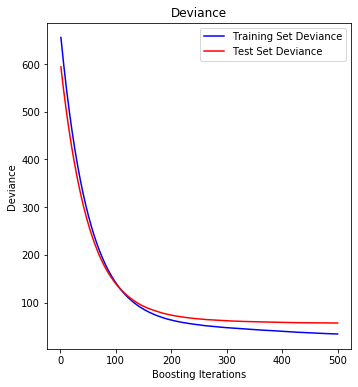

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(500) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(500) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [35]:
mean_squared_error(y_test, model.predict(X_test))

56.98538744541593

In [36]:
train_pred = model.predict(X_train)
train_preds_acc = []
for i in range(len(y_train)):
    if (y_train_lower_bounds.iloc[i].price <= train_pred[i] <= y_train_upper_bounds.iloc[i].price):
        train_preds_acc.append(1)
    else:
        train_preds_acc.append(0)
        
test_pred = model.predict(X_test)
test_preds_acc = []
for i in range(len(y_test)):
    if (y_test_lower_bounds.iloc[i].price <= test_pred[i] <= y_test_upper_bounds.iloc[i].price):
        test_preds_acc.append(1)
    else:
        test_preds_acc.append(0)

In [37]:
print(np.mean(train_preds_acc))
print(np.mean(test_preds_acc))

0.5544
0.468


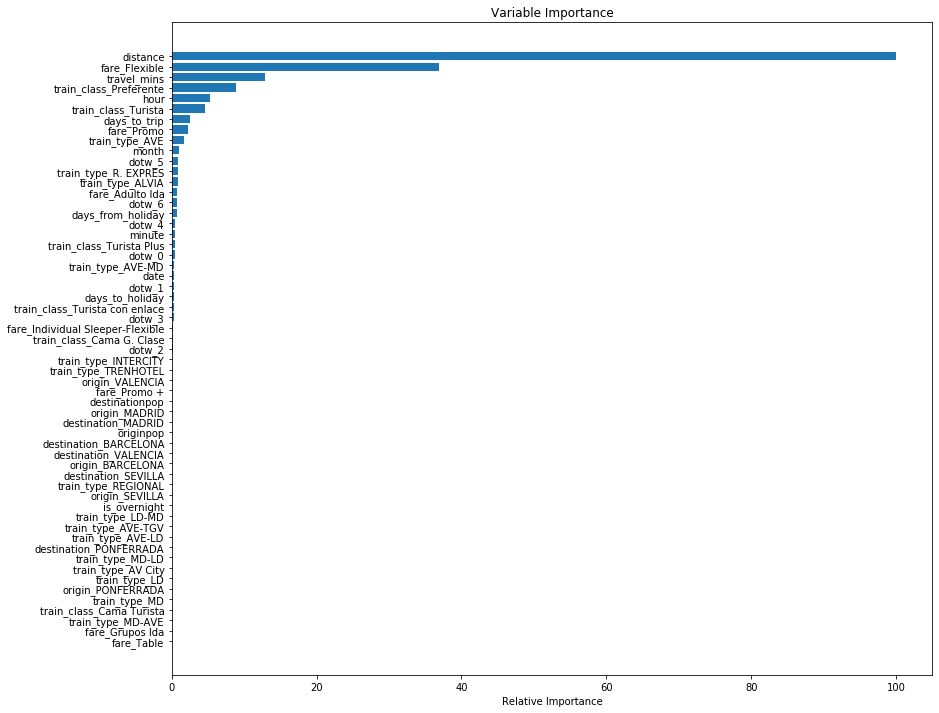

In [38]:
indices = np.array(list(range(len(features))))
features = np.array(features)[indices.astype(int)]
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(30, 12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Neural Networks

In [41]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

def base_model():
    model = Sequential()
    model.add(Dense(10, input_dim = 57, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
    adam = Adam()
    # Compile
    model.compile(loss = 'mean_squared_error', optimizer=adam, metrics =['mean_squared_error'])
    return model

def run_network(xtrain, xtest, ytrain, ytest, model, epochs, batch):
    model.fit(xtrain, ytrain, nb_epoch = epochs, batch_size = batch,
              validation_data = (xtest, ytest),verbose = 2)
    return model

# Change the number of layers but hold the number of hidden neurons constant
def change_layers_neurons(numlayers, numneurons):
    model = Sequential()
    model.add(Dense(numneurons, input_dim = 57, kernel_initializer = 'normal', activation = 'relu'))
    for x in range(1- numlayers):
        model.add(Dense(numneurons, kernel_initializer = 'normal', activation = 'relu'))
#        if x in (3, 7, 11):
#            model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
    adam = Adam()
    model.compile(loss = 'mean_squared_error', optimizer=adam, metrics =['mean_squared_error'])
    return model
#
#def changenumneurons(numneurons):
#    model = Sequential()
#    model.add(Dense(numneurons, input_dim = 57, kernel_initializer = 'normal', activation = 'relu'))
#    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
#    adam = Adam()
#    model.compile(loss = 'mean_squared_error', optimizer=adam, metrics =['mean_squared_error'])
#    return model

basemodel = base_model()
basemodel.summary()

# Run Network for Base Model
run_network(X_train, X_test, y_train, y_test, basemodel, 10,20)
# loss: 71.4160 - mean_squared_error: 71.4160 - val_loss: 87.4430 - val_mean_squared_error: 87.4430


# Create more networks hold number of neurons/layer constant
 
# 5 layers

model1 = change_layers_neurons(5, 10)
run_network(X_train, X_test, y_train, y_test, model1, 10,20)
run_network(X_train, X_test, y_train, y_test, model1, 10,3)
#  loss: 90.4071 - mean_squared_error: 90.4070 - val_loss: 103.8374 - val_mean_squared_error: 103.8374
#loss: 76.7292 - mean_squared_error: 76.7292 - val_loss: 91.1591 - val_mean_squared_error: 91.1588

# 10 layers
model2 = change_layers_neurons(10, 10)
run_network(X_train, X_test, y_train, y_test, model2, 10,20)
# loss: 86.6922 - mean_squared_error: 86.6923 - val_loss: 96.1824 - val_mean_squared_error: 96.1825


# 15 layers

model3 = change_layers_neurons(15, 10)
run_network(X_train, X_test, y_train, y_test, model3, 10,20)
# loss: 86.0480 - mean_squared_error: 86.0479 - val_loss: 90.0093 - val_mean_squared_error: 90.0093

# 25 layers

model4 = change_layers_neurons(25, 10)
run_network(X_train, X_test, y_train, y_test, model3, 10,20)
# loss: 82.1912 - mean_squared_error: 82.1912 - val_loss: 95.2062 - val_mean_squared_error: 95.2062

# Create layers with more neurons, hold number of layers constant

# 15 neurons
model5 = change_layers_neurons(3, 15)
run_network(X_train, X_test, y_train, y_test, model5, 10,20)

# 20 neurons
model6 = change_layers_neurons(3, 20)
run_network(X_train, X_test, y_train, y_test, model6, 10,20)

# 30 neurons
model7 = change_layers_neurons(3, 30)
run_network(X_train, X_test, y_train, y_test, model7, 10,20)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                580       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


/Users/hannahstoik/PycharmProjects/smlproject/venv/lib/python/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 37500 samples, validate on 12500 samples
Epoch 1/10
 - 1s - loss: 1250.1479 - mean_squared_error: 1250.1486 - val_loss: 150.4042 - val_mean_squared_error: 150.4042
Epoch 2/10
 - 1s - loss: 125.6441 - mean_squared_error: 125.6440 - val_loss: 106.3267 - val_mean_squared_error: 106.3267
Epoch 3/10
 - 1s - loss: 110.5778 - mean_squared_error: 110.5777 - val_loss: 102.5096 - val_mean_squared_error: 102.5095
Epoch 4/10
 - 1s - loss: 108.1905 - mean_squared_error: 108.1904 - val_loss: 108.9688 - val_mean_squared_error: 108.9688
Epoch 5/10
 - 1s - loss: 107.4526 - mean_squared_error: 107.4525 - val_loss: 106.6112 - val_mean_squared_error: 106.6111
Epoch 6/10
 - 1s - loss: 107.0316 - mean_squared_error: 107.0316 - val_loss: 103.1439 - val_mean_squared_error: 103.1439
Epoch 7/10
 - 1s - loss: 106.7329 - mean_squared_error: 106.7329 - val_loss: 103.8925 - val_mean_squared_error: 103.8925
Epoch 8/10
 - 1s - loss: 106.4627 - mean_squared_error: 106.4627 - val_loss: 103.7637 - val_mean_squa

Epoch 7/10
 - 1s - loss: 106.3483 - mean_squared_error: 106.3483 - val_loss: 109.3271 - val_mean_squared_error: 109.3271
Epoch 8/10
 - 1s - loss: 106.0572 - mean_squared_error: 106.0572 - val_loss: 106.5390 - val_mean_squared_error: 106.5390
Epoch 9/10
 - 1s - loss: 105.6920 - mean_squared_error: 105.6920 - val_loss: 109.2750 - val_mean_squared_error: 109.2750
Epoch 10/10
 - 1s - loss: 105.4917 - mean_squared_error: 105.4917 - val_loss: 102.5432 - val_mean_squared_error: 102.5432
Train on 37500 samples, validate on 12500 samples
Epoch 1/10
 - 1s - loss: 926.3484 - mean_squared_error: 926.3473 - val_loss: 131.7153 - val_mean_squared_error: 131.7153
Epoch 2/10
 - 1s - loss: 117.8550 - mean_squared_error: 117.8550 - val_loss: 101.3260 - val_mean_squared_error: 101.3260
Epoch 3/10
 - 1s - loss: 106.5306 - mean_squared_error: 106.5307 - val_loss: 101.0200 - val_mean_squared_error: 101.0200
Epoch 4/10
 - 1s - loss: 101.8672 - mean_squared_error: 101.8672 - val_loss: 95.0435 - val_mean_square